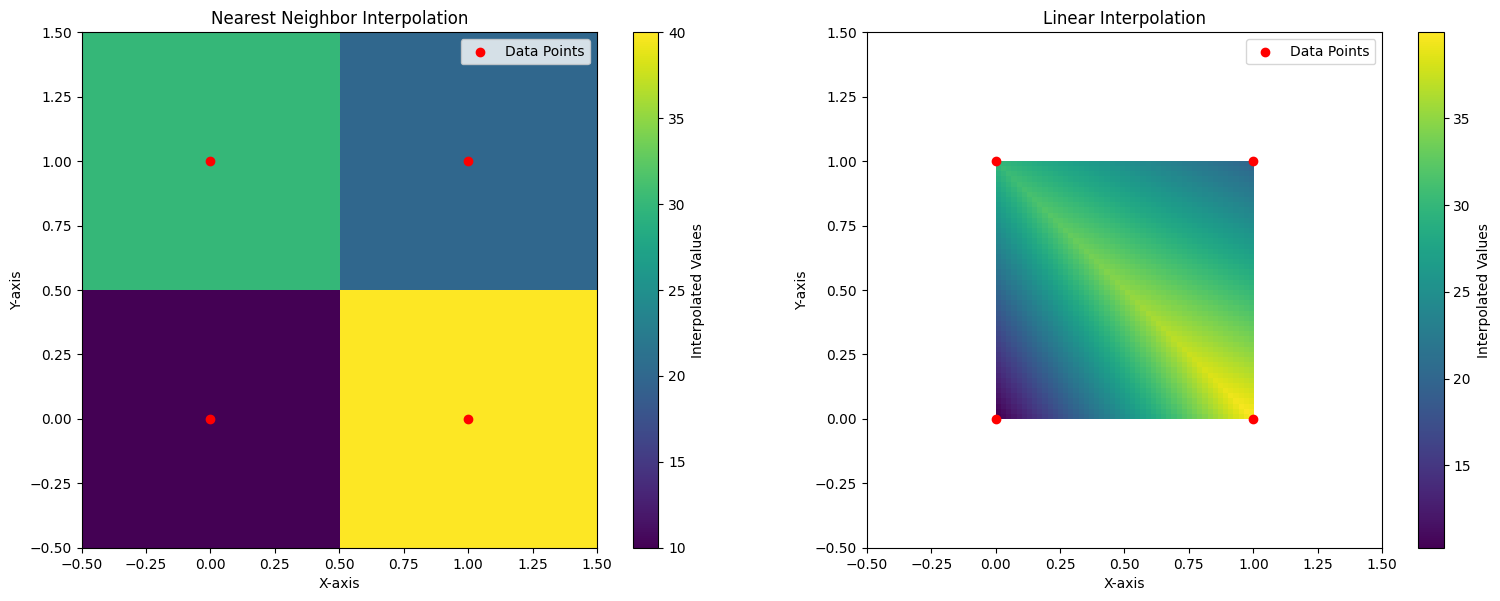

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator

# Sample data points (x, y) and their corresponding values (z)
points = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
values = np.array([10, 20, 30, 40])  # Values at those points

# Create the NearestNDInterpolator
nearest_interpolator = NearestNDInterpolator(points, values)

# Create the LinearNDInterpolator
linear_interpolator = LinearNDInterpolator(points, values)

# Create a grid of points where we want to interpolate the values
grid_x, grid_y = np.mgrid[-0.5:1.5:100j, -0.5:1.5:100j]
grid_points = np.vstack((grid_x.ravel(), grid_y.ravel())).T

# Interpolate the values at the grid points using both methods
nearest_grid_values = nearest_interpolator(grid_points)
linear_grid_values = linear_interpolator(grid_points)

# Reshape the interpolated values back to the grid shape
nearest_grid_values = nearest_grid_values.reshape(grid_x.shape)
linear_grid_values = linear_grid_values.reshape(grid_x.shape)

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Nearest Neighbor Interpolation
nearest_img = axs[0].imshow(nearest_grid_values, extent=(-0.5, 1.5, -0.5, 1.5), origin='lower', cmap='viridis')
axs[0].scatter(points[:, 0], points[:, 1], color='red', label='Data Points')
axs[0].set_title('Nearest Neighbor Interpolation')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].legend()
plt.colorbar(nearest_img, ax=axs[0], label='Interpolated Values')

# Linear Interpolation
linear_img = axs[1].imshow(linear_grid_values, extent=(-0.5, 1.5, -0.5, 1.5), origin='lower', cmap='viridis')
axs[1].scatter(points[:, 0], points[:, 1], color='red', label='Data Points')
axs[1].set_title('Linear Interpolation')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].legend()
plt.colorbar(linear_img, ax=axs[1], label='Interpolated Values')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from scipy.interpolate import LinearNDInterpolator

# Sample data points (x, y) and their corresponding values (z)
points = np.array([[200, 30], [250, 35], [200, 35], [250, 30]])
values = np.array([10, 20, 30, 40])  # Values at those points

# Create the LinearNDInterpolator
linear_interpolator = LinearNDInterpolator(points, values)

# Specify the point (x, y) where you want to get the interpolated value
x = 225
y = 31

# Get the interpolated value at the specified point
interpolated_value = linear_interpolator(x, y)

# Print the result
print(f"The interpolated value at point ({x}, {y}) is: {interpolated_value}")

The interpolated value at point (225, 31) is: 29.0


In [13]:
import numpy as np
from scipy.interpolate import LinearNDInterpolator

# Sample data points (x, y) and their corresponding values (z)
points = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
# Define values as a 2D array where each row corresponds to a different set of values
values = np.array([
    [10, 20, 30, 40],   # Set 1
    [1, 2, 3, 4],       # Set 2
    [100, 200, 300, 400], # Set 3
    [12, 22, 32, 42]    # Set 4
])

# Create a list to hold interpolators for each set of values
interpolators = [LinearNDInterpolator(points, values[i]) for i in range(values.shape[0])]

# Specify a point (x, y) where you want to get the interpolated values
x = 0.5
y = 0.5

# Get the interpolated values for the specified point for each set of values
interpolated_values = [interpolator(x, y) for interpolator in interpolators]

# Print the results
for j, value in enumerate(interpolated_values):
    print(f"Interpolated value at point ({x}, {y}) for Set {j + 1}: {value:.2f}")


Interpolated value at point (0.5, 0.5) for Set 1: 35.00
Interpolated value at point (0.5, 0.5) for Set 2: 3.50
Interpolated value at point (0.5, 0.5) for Set 3: 350.00
Interpolated value at point (0.5, 0.5) for Set 4: 37.00
